# Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def data_load(file, target):
  """
  This function loads data in a dataframe, outputs information from data and
  plots the target class distribution.

  """

  df = pd.read_csv(file, delimiter = ';')
  inn = df.info()

  df[target].hist(figsize = (8, 4))
  plt.xlabel(target)
  plt.ylabel('Count')
  plt.xticks([0, 1])
  plt.grid(False)
  plt.title('Target Class distribution')

  return df, inn, plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         124494 non-null  object
 1   product      124494 non-null  object
 2   malfunction  124494 non-null  int64 
 3   feature1     124494 non-null  int64 
 4   feature2     124494 non-null  int64 
 5   feature3     124494 non-null  int64 
 6   feature4     124494 non-null  int64 
 7   feature5     124494 non-null  int64 
 8   feature6     124494 non-null  int64 
 9   feature7     124494 non-null  int64 
 10  feature8     124494 non-null  int64 
 11  feature9     124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


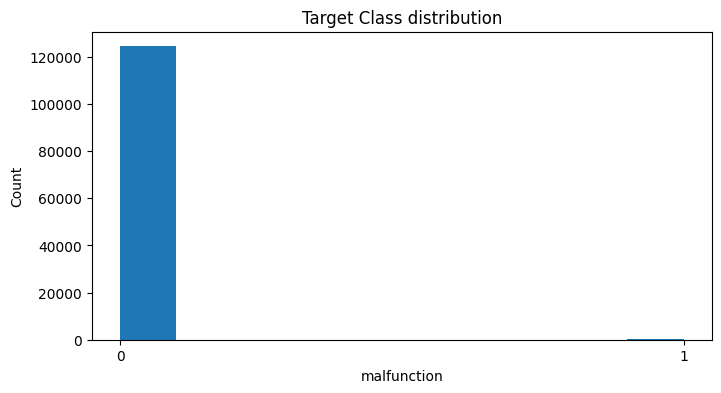

In [ ]:
df, inn, dist = data_load('dataset.csv', 'malfunction')

> **Unique values in each variable of the dataset**

In [ ]:
 df.nunique()

,0
date,304
product,1168
malfunction,2
feature1,123878
feature2,558
feature3,47
feature4,115
feature5,60
feature6,44838
feature7,28


In [ ]:
df['date'].min()           #data start date

'01.01.2015'

> **Checking number of (product) failures from historical data.**

 > Device malfunction

 >> 0 -> non-failure, 1 -> failure

In [ ]:
m = df['malfunction'].value_counts()
print(m)
m1 = len(df[df['malfunction'] == 1])
print('There are {} failures of 1168 unique products in the given period of time.'.format(m1))



#freq = df.groupby(['product']).size().reset_index(name = 'frequency')
#print(freq)
#m2 = len(df['product'].unique())
#print('There are {} unique products.'.format(m2))

malfunction
0    124388
1       106
Name: count, dtype: int64
There are 106 failures of 1168 unique products in the given period of time.


> **Checking data sparsity**

In [ ]:
df1 = df[['feature1', 'feature2', 'feature3', 'feature4',
        'feature5', 'feature6', 'feature7', 'feature8', 'feature9']]
(df1 == 0).astype(int).sum(axis = 0)

,0
feature1,11
feature2,118110
feature3,115359
feature4,115156
feature5,0
feature6,0
feature7,123036
feature8,123036
feature9,97358


>> Only feature1, feature5, and feature6 are not sparse, rest of them are.

# Data pre-processing

> **Correlation between numeric features**

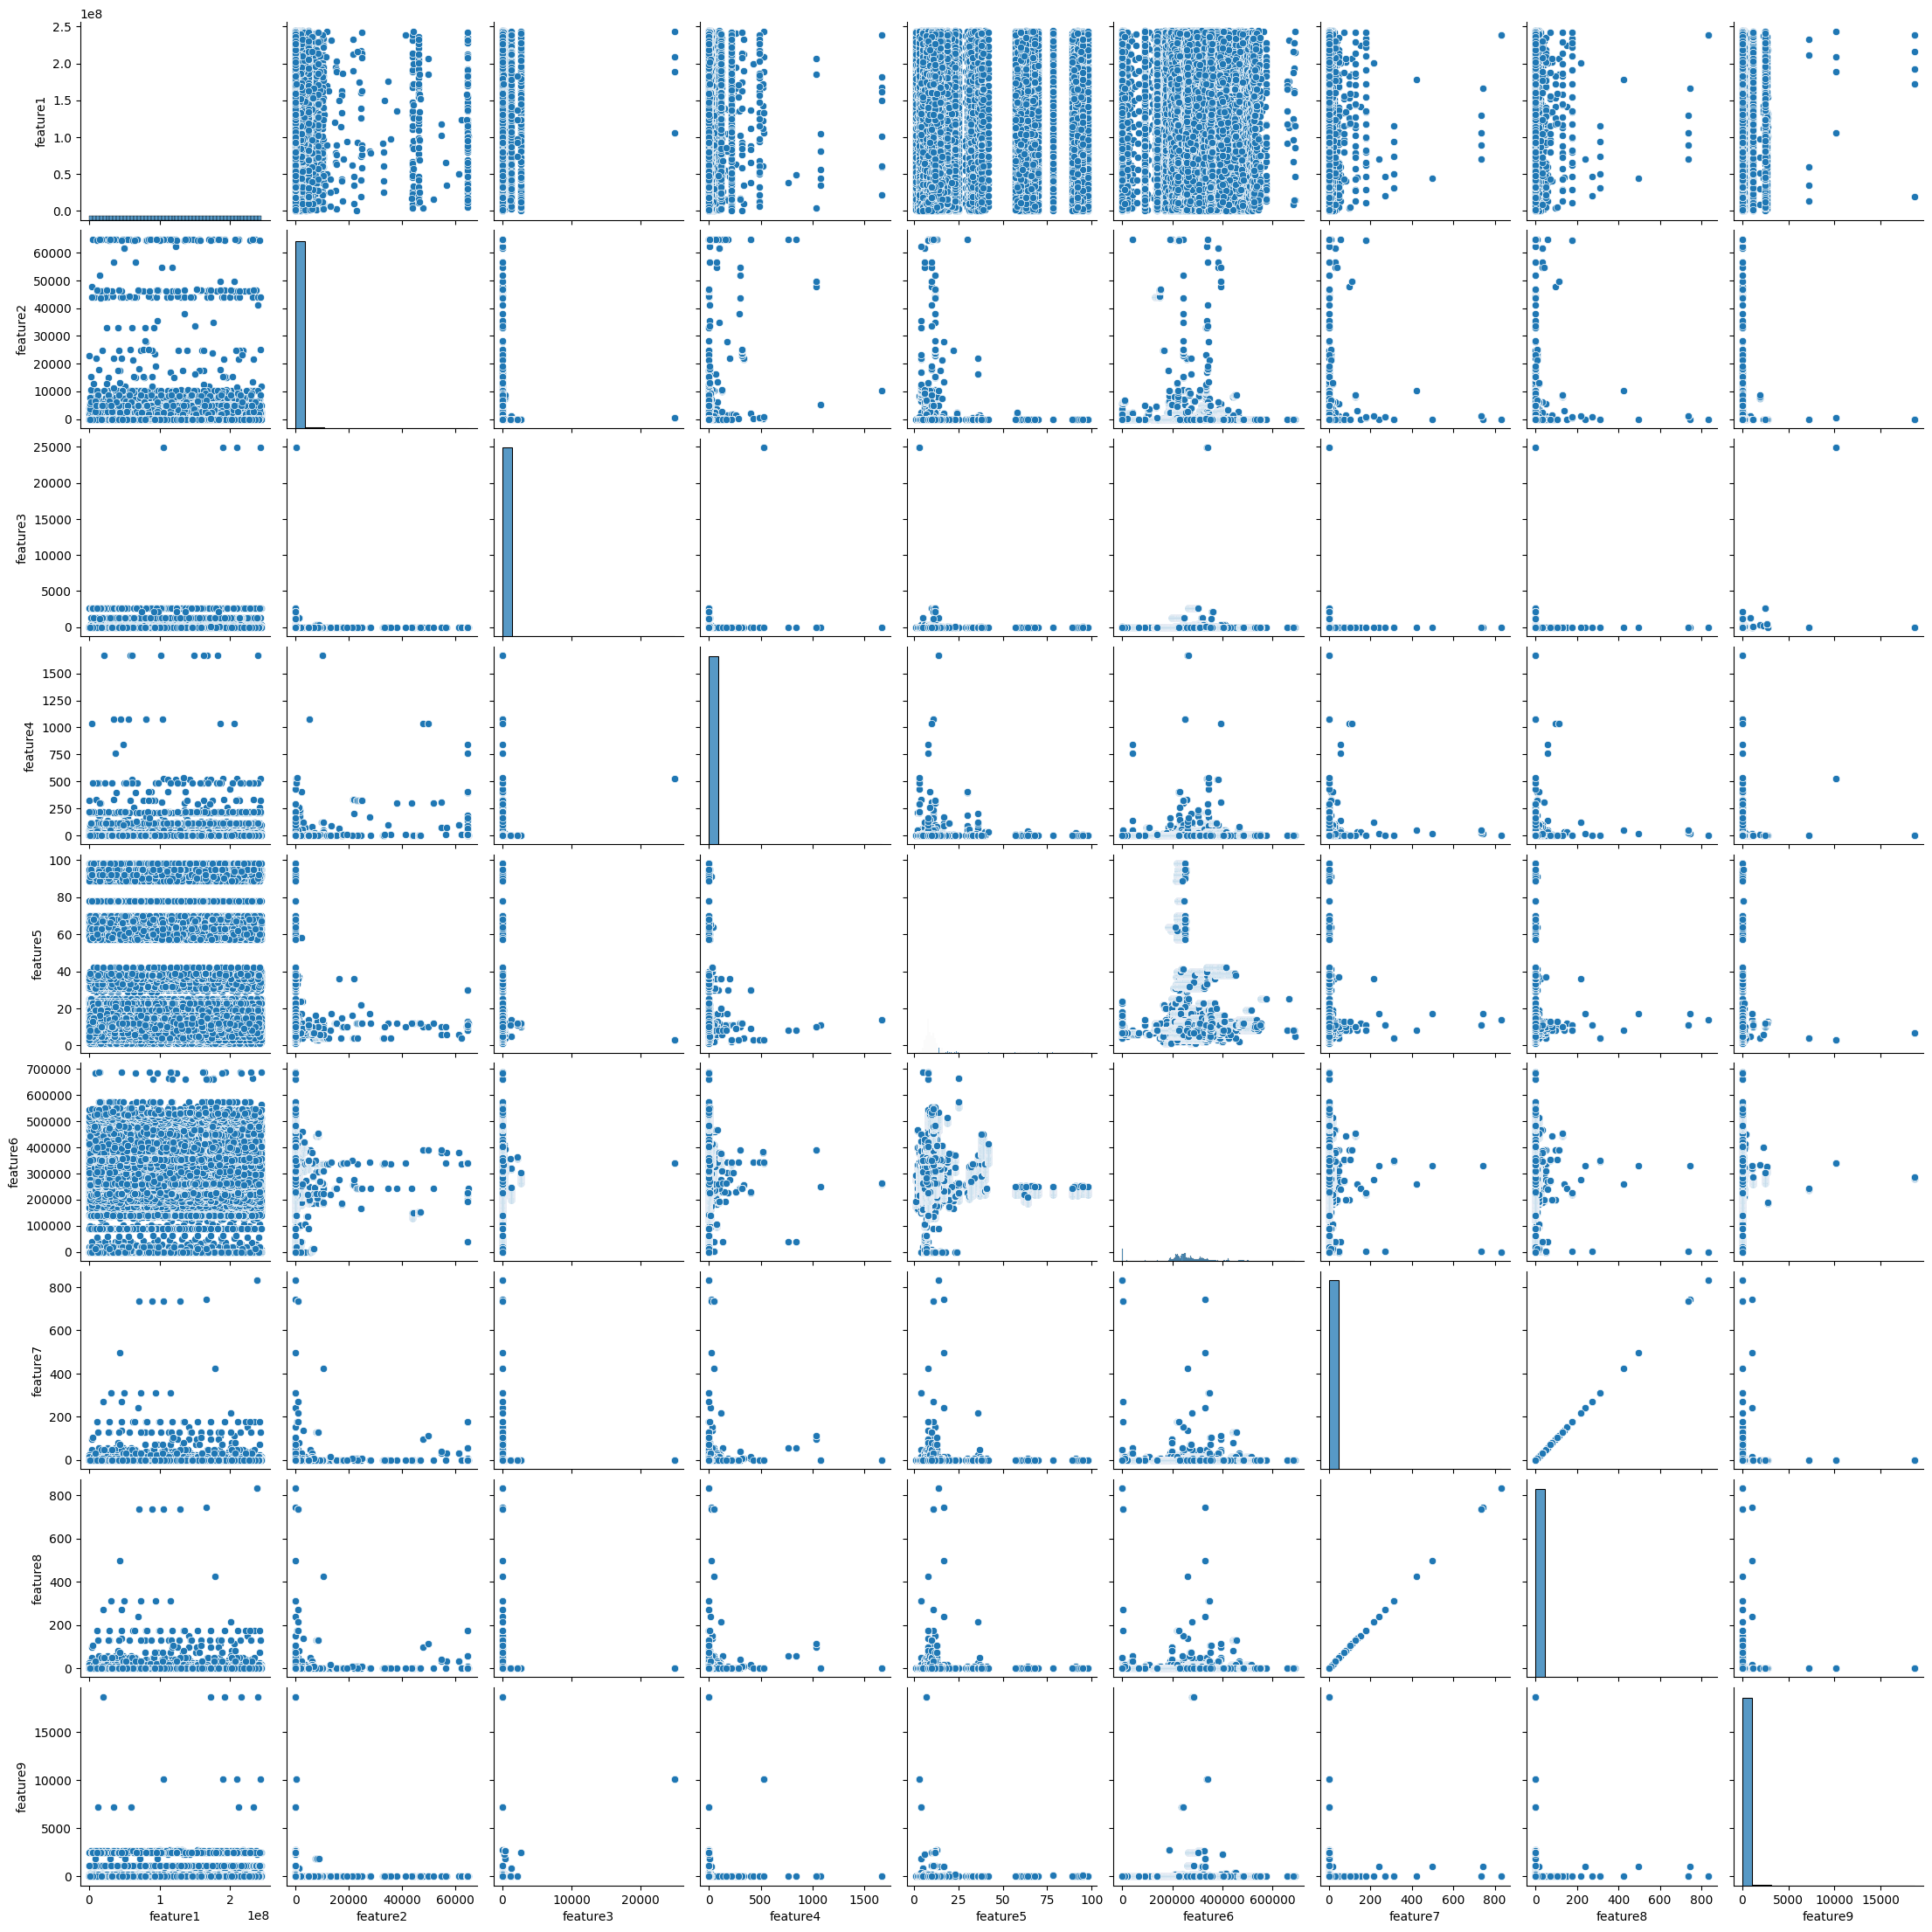

In [ ]:
sns.pairplot(df1)
plt.show()

<Axes: >

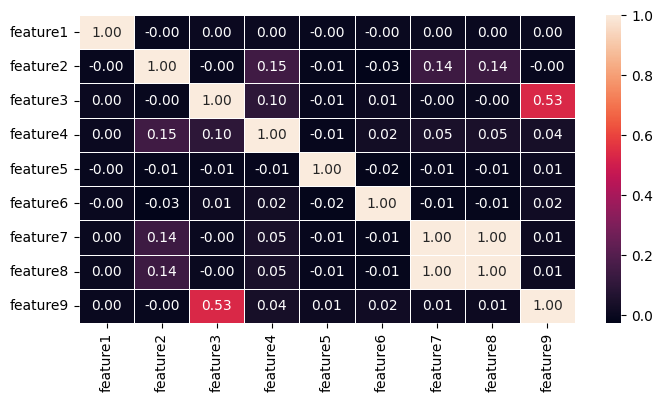

In [ ]:
plt.figure(figsize = (8, 4))
sns.heatmap(df1.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.5)

array([[<Axes: title={'center': 'feature1'}>,
        <Axes: title={'center': 'feature2'}>,
        <Axes: title={'center': 'feature3'}>],
       [<Axes: title={'center': 'feature4'}>,
        <Axes: title={'center': 'feature5'}>,
        <Axes: title={'center': 'feature6'}>],
       [<Axes: title={'center': 'feature7'}>,
        <Axes: title={'center': 'feature8'}>,
        <Axes: title={'center': 'feature9'}>]], dtype=object)

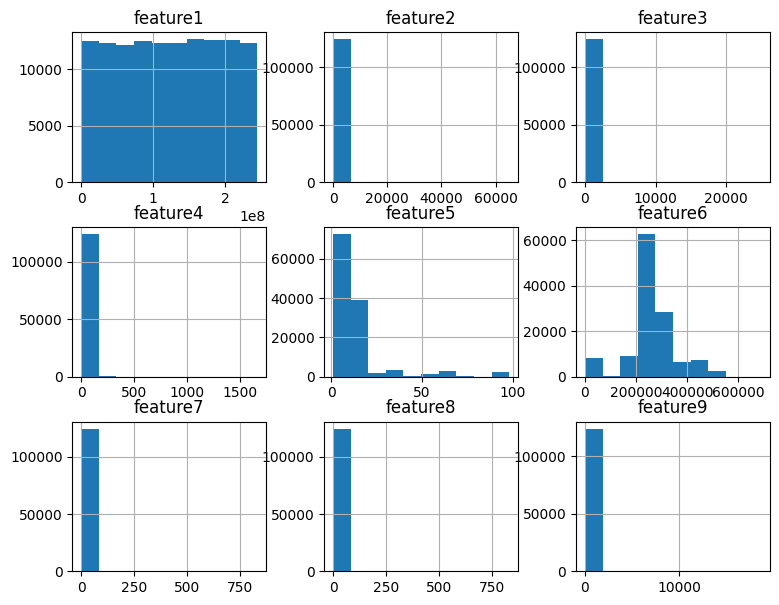

In [ ]:
df1.hist(figsize = (9, 7))

>> Features 7 & 8 are linearly and highly correlated. We will drop one of them due to redundancy.

>> Features 2, 3, 4, 7, 9 are very highly skewed.

>> Also, features 3, 5, 7, 8, 9 are very small compared to others. We shall convert them into categorical variables.

In [ ]:
df = df.drop('feature8', axis = 1)

cat_filters = ['feature3', 'feature5', 'feature7', 'feature9']
for col in cat_filters:
    df[col] = df[col].astype('object')

df.info()



#df2 = pd.DataFrame(df.query('malfunction == 1')[['date', 'product']])
#n = len(df2['product'].unique())
#df2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         124494 non-null  object
 1   product      124494 non-null  object
 2   malfunction  124494 non-null  int64 
 3   feature1     124494 non-null  int64 
 4   feature2     124494 non-null  int64 
 5   feature3     124494 non-null  object
 6   feature4     124494 non-null  int64 
 7   feature5     124494 non-null  object
 8   feature6     124494 non-null  int64 
 9   feature7     124494 non-null  object
 10  feature9     124494 non-null  object
dtypes: int64(5), object(6)
memory usage: 10.4+ MB


> In 1 day (can be any date), there are multiple product malfunctions.

In [ ]:
df.head(10)

,date,product,malfunction,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature9
0,01.01.2015,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,01.01.2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,01.01.2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,01.01.2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,01.01.2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,3
5,01.01.2015,S1F01TD5,0,68837488,0,0,41,6,413535,0,1
6,01.01.2015,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0
7,01.01.2015,S1F023H2,0,141503600,0,0,1,19,494462,16,3
8,01.01.2015,S1F02A0J,0,8217840,0,1,0,14,311869,0,0
9,01.01.2015,S1F02DZ2,0,116440096,0,323,9,9,407905,0,164


>> The magitude of features are very different, so data scaling is required.

> **Feature Creation**

In [ ]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

df['active'] = df['date'] - df['date'][0]    #based on the start date
df['month'] = df['date'].dt.month
df['Day_of_week'] = df['date'].dt.weekday
df['Day_of_week'] = df['Day_of_week'].replace(0, 7)
df.head(5)

,date,product,malfunction,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature9,active,month,Day_of_week
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,1,3


In [ ]:
df['date'].min(), df['date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-12-10 00:00:00'))

> **Unique products per month**

       product
month         
1         1164
2         1164
3         1164
4         1163
5         1162
6         1060
7          850
8          808
9          809
10         808
11         808
12         787


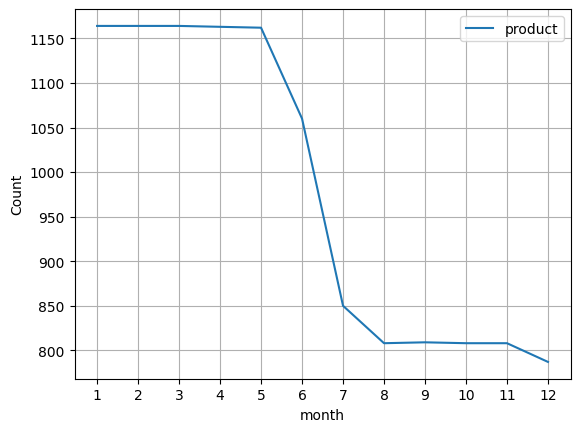

In [ ]:
print(df.groupby('month').agg({'product':lambda x: x.nunique()}))

df.groupby('month').agg({'product':lambda x: x.nunique()}).plot()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.ylabel('Count')
plt.grid()
plt.show()

>> Post May 2016 (almost no reduction till May), number of products got lesser steadily till August, after which some stability is seen till a drop in number again post November (2015).

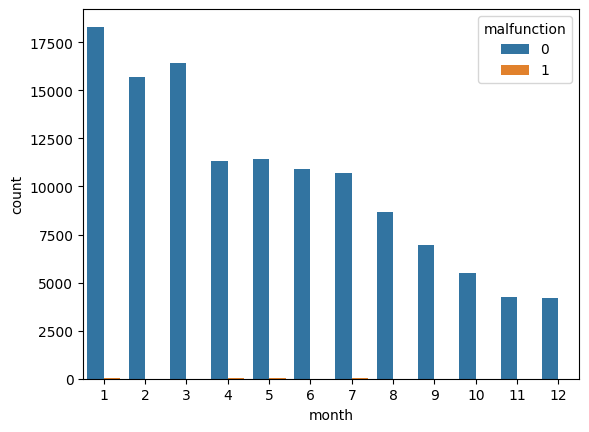

In [ ]:
ax = sns.countplot(x = "month", hue = "malfunction", data = df)
plt.show()

>> Closer look to understand the failures

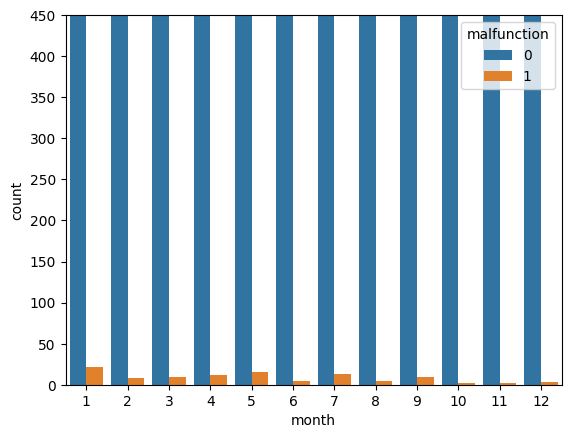

In [ ]:
ax = sns.countplot(x = "month", hue = "malfunction", data = df)
plt.ylim([0, 450])
plt.show()

>> Failures have been occuring every month till October when a drop in the number of failures is seen. First month saw the most number of failures though.

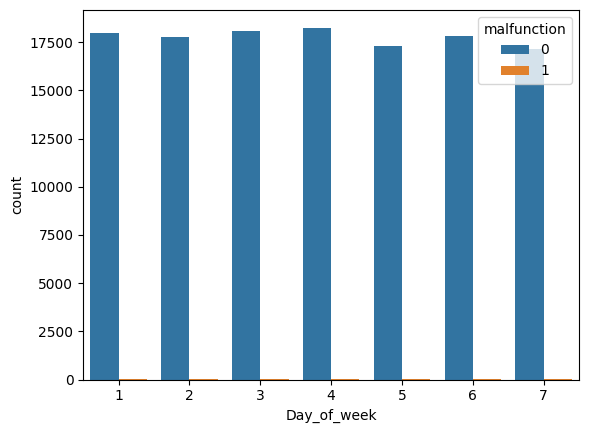

In [ ]:
ax = sns.countplot(x = 'Day_of_week', hue = 'malfunction', data = df)
plt.show()

>> Closer look

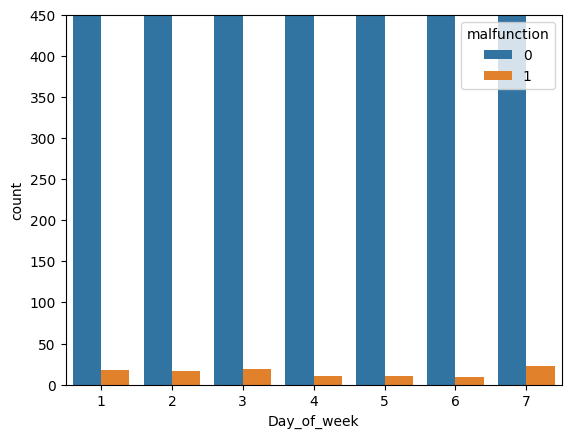

In [ ]:
ax = sns.countplot(x = 'Day_of_week', hue = 'malfunction', data = df)
plt.ylim([0, 450])
plt.show()

> Failures have occured pretty much every day of the week.

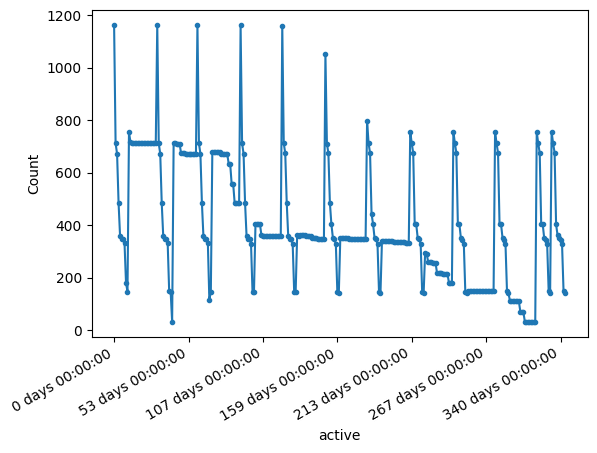

In [ ]:
df.groupby('active')['product'].count().plot( marker = '.')
plt.ylabel('Count')
plt.show()

> Products are brought back to use after they have been fixed post failure.

In [ ]:
df_date = df.groupby('product').agg({'date': max})
df_date.date.to_dict()

df_fail = df.loc[df['malfunction'] == 1,['product', 'date']]
df_good = df.loc[df['malfunction'] == 0,['product', 'date']]

df_date.shape,df_fail.shape
df['max_date'] = df['product'].map(df_date['date'].to_dict())

<ipython-input-296-1b21cb372a01>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_date = df.groupby('product').agg({'date': max})


>> max_date is the last date the product was checked. If the max_date is ahead of malfunction or failure date for a product, then the fixed product came back to use (after failure).

>> Let's see below how many products came back for re-usage.

In [ ]:
dff = df[(df['malfunction'] == 1) & (df['date'] != df['max_date'])]
dff

,date,product,malfunction,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature9,active,month,Day_of_week,max_date
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,1,12 days,1,1,2015-12-01
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,13 days,1,2,2015-12-01
14734,2015-01-17,W1F0T034,1,154998752,1312,0,18,10,306996,0,0,16 days,1,5,2015-12-01
15087,2015-01-18,S1F0GG8X,1,54292264,64736,0,160,11,192179,0,2,17 days,1,6,2015-12-01
15773,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,3,18 days,1,7,2015-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109927,2015-04-08,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,97 days,4,2,2015-12-07
114251,2015-08-18,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,11,229 days,8,1,2015-12-08
122118,2015-05-10,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,129 days,5,6,2015-12-09
122808,2015-09-10,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,252 days,9,3,2015-12-09


>> We shall look at the unique products and re-arrange the dataset.

In [ ]:
df2 = df.groupby('product').agg({'date': max})
df2.shape

<ipython-input-298-b1224bd71f5c>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df2 = df.groupby('product').agg({'date': max})


(1168, 1)

In [ ]:
df2 = df2.reset_index()
df = df.reset_index(drop = True)
df3 = pd.merge(df2, df, how = 'left', on = ['product', 'date'])
df3.shape

(1168, 15)

>> We will work further with this dataframe df3

> Since we have information of products (99 in number) coming back after failure, we will create 1 new feature to capture this.

In [ ]:
df3['failure_before'] = 0
df3.head(5)

,product,date,malfunction,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature9,active,month,Day_of_week,max_date,failure_before
0,S1F01085,2015-06-01,0,128832128,56,0,52,6,409404,0,7,151 days,6,7,2015-06-01,0
1,S1F013BB,2015-11-05,0,115676688,0,0,0,5,689161,0,0,308 days,11,3,2015-11-05,0
2,S1F0166B,2015-06-01,0,7441792,0,3,0,6,404786,0,0,151 days,6,7,2015-06-01,0
3,S1F01E6Y,2015-12-02,0,182622184,0,0,0,12,259460,0,0,335 days,12,2,2015-12-02,0
4,S1F01JE0,2015-06-01,0,185424928,0,0,0,6,412151,0,0,151 days,6,7,2015-06-01,0


In [ ]:
for name in dff['product'].tolist():
  df3.loc[(df3['product'] == name), 'failure_before'] = 1

df3.head(10)

,product,date,malfunction,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature9,active,month,Day_of_week,max_date,failure_before
0,S1F01085,2015-06-01,0,128832128,56,0,52,6,409404,0,7,151 days,6,7,2015-06-01,0
1,S1F013BB,2015-11-05,0,115676688,0,0,0,5,689161,0,0,308 days,11,3,2015-11-05,0
2,S1F0166B,2015-06-01,0,7441792,0,3,0,6,404786,0,0,151 days,6,7,2015-06-01,0
3,S1F01E6Y,2015-12-02,0,182622184,0,0,0,12,259460,0,0,335 days,12,2,2015-12-02,0
4,S1F01JE0,2015-06-01,0,185424928,0,0,0,6,412151,0,0,151 days,6,7,2015-06-01,0
5,S1F01R2B,2015-12-08,0,187540048,0,0,0,19,339283,0,3,341 days,12,1,2015-12-08,0
6,S1F01TD5,2015-06-01,0,21103248,0,0,41,6,415259,0,1,151 days,6,7,2015-06-01,0
7,S1F01XDJ,2015-12-04,0,6252720,0,0,0,8,426706,0,0,337 days,12,4,2015-12-04,0
8,S1F023H2,2015-12-01,0,156754936,0,0,1,19,506684,16,3,334 days,12,1,2015-12-01,1
9,S1F02A0J,2015-12-08,0,43254744,0,1,0,16,348302,0,0,341 days,12,1,2015-12-08,0


> Modifying product ids for ease of understanding

In [ ]:
id = df3['product'].values.tolist()

id1 = []
for m in id:
    m = m[:4]
    id1.append(m)

df3['product'] = id1
df3['product'].value_counts()

,count
product,
S1F0,391
W1F0,282
Z1F0,149
S1F1,139
W1F1,137
Z1F1,67
Z1F2,3


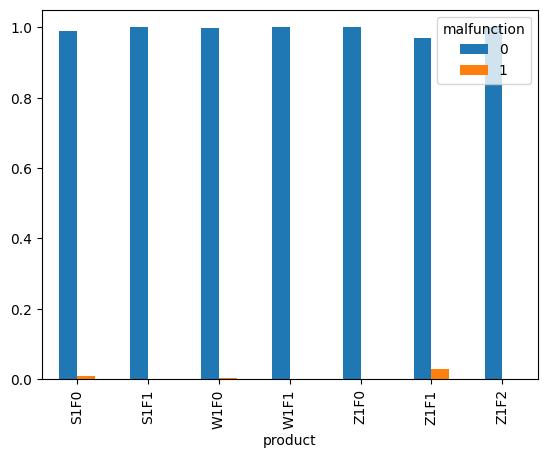

In [ ]:
dev = pd.crosstab(df3['product'], df3['malfunction'])

dev.div(dev.sum(1).astype(float), axis = 0).plot(kind = "bar")
plt.show()

>> Products with ids starting with Z1F1 have failed the most in the given time period.

In [ ]:
df3.nunique()

,0
product,7
date,18
malfunction,2
feature1,1168
feature2,102
feature3,43
feature4,55
feature5,58
feature6,1129
feature7,14


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   product         1168 non-null   object         
 1   date            1168 non-null   datetime64[ns] 
 2   malfunction     1168 non-null   int64          
 3   feature1        1168 non-null   int64          
 4   feature2        1168 non-null   int64          
 5   feature3        1168 non-null   object         
 6   feature4        1168 non-null   int64          
 7   feature5        1168 non-null   object         
 8   feature6        1168 non-null   int64          
 9   feature7        1168 non-null   object         
 10  feature9        1168 non-null   object         
 11  active          1168 non-null   timedelta64[ns]
 12  month           1168 non-null   int32          
 13  Day_of_week     1168 non-null   int32          
 14  max_date        1168 non-null   datetime

In [ ]:
df3['feature4']= df3['feature4'].astype('object')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   product         1168 non-null   object         
 1   date            1168 non-null   datetime64[ns] 
 2   malfunction     1168 non-null   int64          
 3   feature1        1168 non-null   int64          
 4   feature2        1168 non-null   int64          
 5   feature3        1168 non-null   object         
 6   feature4        1168 non-null   object         
 7   feature5        1168 non-null   object         
 8   feature6        1168 non-null   int64          
 9   feature7        1168 non-null   object         
 10  feature9        1168 non-null   object         
 11  active          1168 non-null   timedelta64[ns]
 12  month           1168 non-null   int32          
 13  Day_of_week     1168 non-null   int32          
 14  max_date        1168 non-null   datetime

In [ ]:
df3['active'] = df3['active'].astype('int')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product         1168 non-null   object        
 1   date            1168 non-null   datetime64[ns]
 2   malfunction     1168 non-null   int64         
 3   feature1        1168 non-null   int64         
 4   feature2        1168 non-null   int64         
 5   feature3        1168 non-null   object        
 6   feature4        1168 non-null   object        
 7   feature5        1168 non-null   object        
 8   feature6        1168 non-null   int64         
 9   feature7        1168 non-null   object        
 10  feature9        1168 non-null   object        
 11  active          1168 non-null   int64         
 12  month           1168 non-null   int32         
 13  Day_of_week     1168 non-null   int32         
 14  max_date        1168 non-null   datetime64[ns]
 15  fail

In [ ]:
for col in ['month','Day_of_week']:
  df3[col] = df3[col].astype('object')

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product         1168 non-null   object        
 1   date            1168 non-null   datetime64[ns]
 2   malfunction     1168 non-null   int64         
 3   feature1        1168 non-null   int64         
 4   feature2        1168 non-null   int64         
 5   feature3        1168 non-null   object        
 6   feature4        1168 non-null   object        
 7   feature5        1168 non-null   object        
 8   feature6        1168 non-null   int64         
 9   feature7        1168 non-null   object        
 10  feature9        1168 non-null   object        
 11  active          1168 non-null   int64         
 12  month           1168 non-null   object        
 13  Day_of_week     1168 non-null   object        
 14  max_date        1168 non-null   datetime64[ns]
 15  fail

In [ ]:
df3.drop(['date','max_date'], axis = 1, inplace = True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1168 non-null   object
 1   malfunction     1168 non-null   int64 
 2   feature1        1168 non-null   int64 
 3   feature2        1168 non-null   int64 
 4   feature3        1168 non-null   object
 5   feature4        1168 non-null   object
 6   feature5        1168 non-null   object
 7   feature6        1168 non-null   int64 
 8   feature7        1168 non-null   object
 9   feature9        1168 non-null   object
 10  active          1168 non-null   int64 
 11  month           1168 non-null   object
 12  Day_of_week     1168 non-null   object
 13  failure_before  1168 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 127.9+ KB


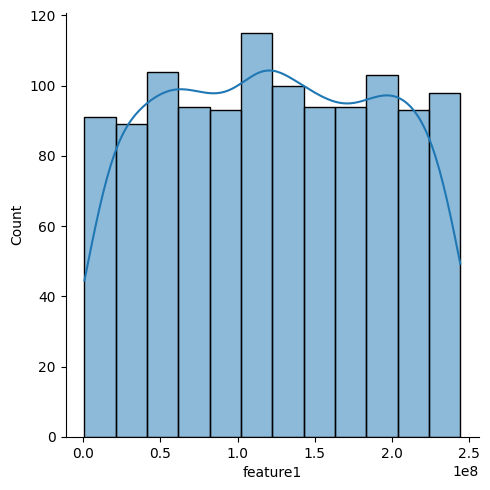

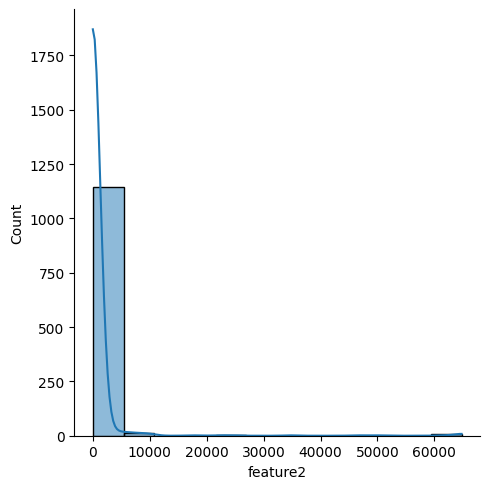

In [ ]:
sns.displot(df3['feature1'], kde = True)
sns.displot(df3['feature2'], kde = True)

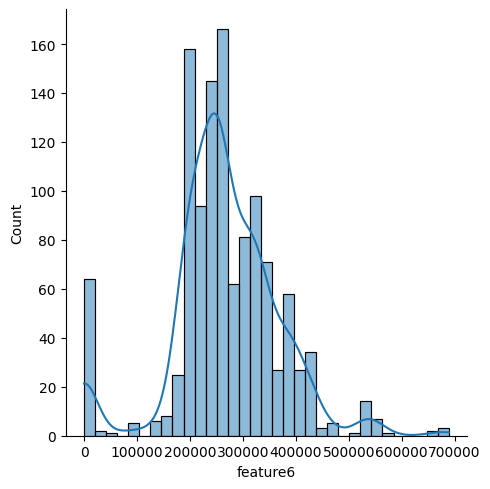

In [ ]:
sns.displot(df3['feature6'], kde = True)

> **Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['feature1', 'feature2', 'feature6']
df3[num_vars] = scaler.fit_transform(df3[num_vars])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         1168 non-null   object 
 1   malfunction     1168 non-null   int64  
 2   feature1        1168 non-null   float64
 3   feature2        1168 non-null   float64
 4   feature3        1168 non-null   object 
 5   feature4        1168 non-null   object 
 6   feature5        1168 non-null   object 
 7   feature6        1168 non-null   float64
 8   feature7        1168 non-null   object 
 9   feature9        1168 non-null   object 
 10  active          1168 non-null   int64  
 11  month           1168 non-null   object 
 12  Day_of_week     1168 non-null   object 
 13  failure_before  1168 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 127.9+ KB


>> **Plots after scaling**

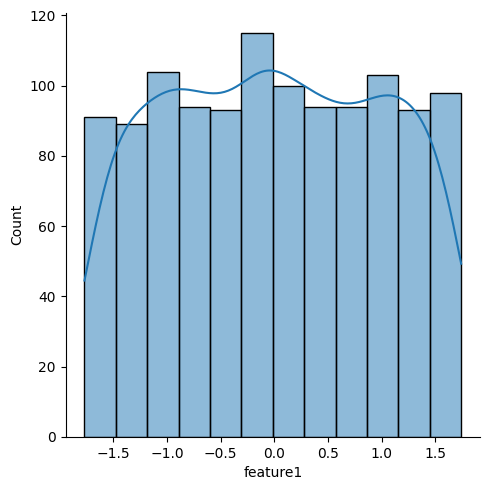

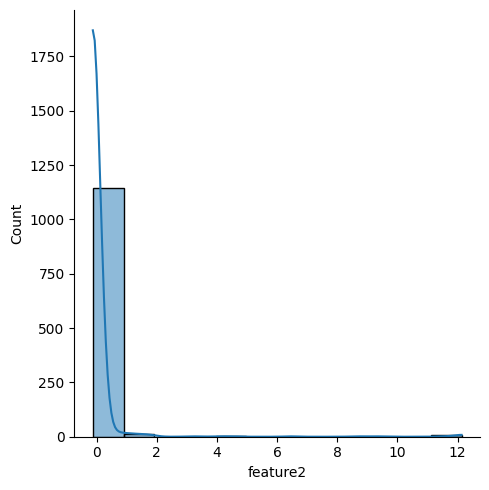

In [ ]:
sns.displot(df3['feature1'], kde = True)
sns.displot(df3['feature2'], kde = True)

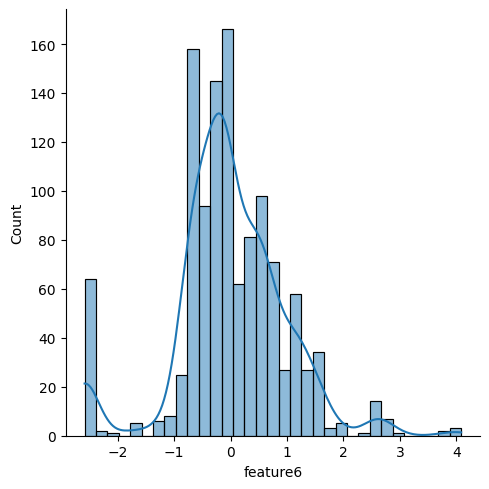

In [ ]:
sns.displot(df3['feature6'], kde = True)

>> Dummies for categorical data

In [ ]:
df3 = pd.get_dummies(df3, drop_first = True)
df3.head(5)

,malfunction,feature1,feature2,feature6,active,failure_before,product_S1F1,product_W1F0,product_W1F1,product_Z1F0,...,month_8,month_9,month_11,month_12,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7
0,0,0.077644,-0.116817,1.377044,13046400000000000,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,-0.112062,-0.127416,4.086766,26611200000000000,0,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,-1.672846,-0.127416,1.332314,13046400000000000,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0.853315,-0.127416,-0.075311,28944000000000000,0,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,0,0.893732,-0.127416,1.403652,13046400000000000,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
print(df3.shape)
df3['malfunction'].value_counts()

(1168, 254)


,count
malfunction,
0,1161
1,7


>> **Separating independent and dependent (response) variables**

In [ ]:
X = df3.drop('malfunction', axis = 1)
Y = df3['malfunction']

# Model building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

>> Data splitting into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
model = LogisticRegression()  #default solver = 'lbfgs'

classify = model.fit(X_train, Y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print("Test Accuracy:")
print(round(accuracy_score(Y_test, predictions), 4))

Test Accuracy:
0.9957


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       0.00      0.00      0.00         1

    accuracy                           1.00       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.99      1.00      0.99       234



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_mat = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[233   0]
 [  1   0]]


Text(50.722222222222214, 0.5, 'True label')

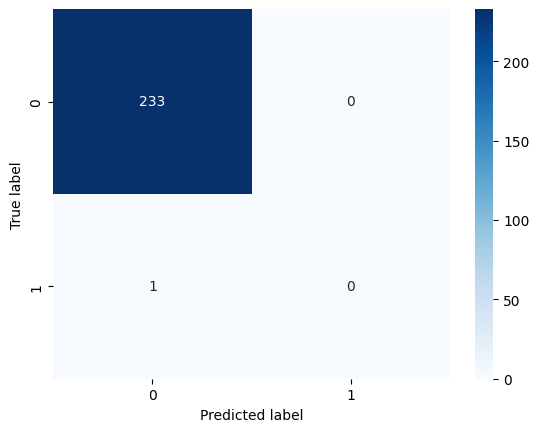

In [ ]:
sns.heatmap(conf_mat, annot = True, fmt = '', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Hyper-parameter Tuning

> **1. Tuning the solver**

In [ ]:
model1 = LogisticRegression(solver = 'newton-cg')

classifier = model1.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:312: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
preds = model1.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(Y_test, preds)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[233   0]
 [  1   0]]


Text(50.722222222222214, 0.5, 'True label')

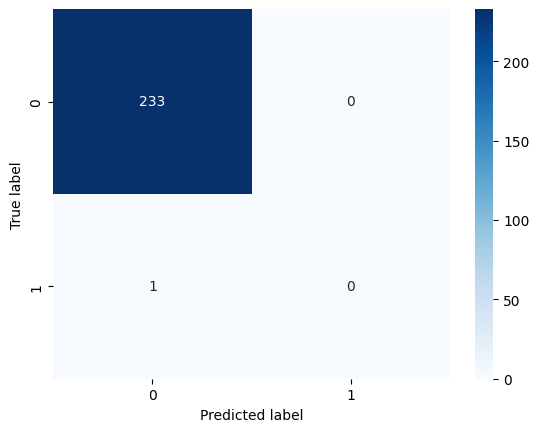

In [ ]:
sns.heatmap(conf_mat, annot = True, fmt = '', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')

>> There's absolutely no change upon changing the solver of the algorithm used to train the model.

> **2. Tuning the decision threshold**

In [ ]:
from sklearn.model_selection import TunedThresholdClassifierCV

In [ ]:
classifier_tuned = TunedThresholdClassifierCV(classifier, scoring = "balanced_accuracy").fit(X_train, Y_train)

print(f"Cut-off point found at {classifier_tuned.best_threshold_}")

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:312: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:312: UserWarning: Line Search f

Cut-off point found at 0.0023019384051188433


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:312: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
print(classification_report(Y_test, classifier_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       233
           1       0.00      0.00      0.00         1

    accuracy                           0.69       234
   macro avg       0.50      0.35      0.41       234
weighted avg       0.99      0.69      0.81       234



In [ ]:
conf_mat = confusion_matrix(Y_test, classifier_tuned.predict(X_test))
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[162  71]
 [  1   0]]


Text(50.722222222222214, 0.5, 'True label')

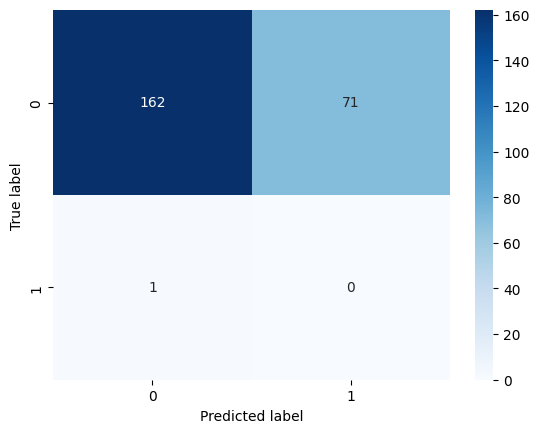

In [ ]:
sns.heatmap(conf_mat, annot = True, fmt = '', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
print("Test Accuracy:")
print(round(accuracy_score(Y_test, classifier_tuned.predict(X_test)), 4))

Test Accuracy:
0.6923


>> Although the performance accuracy of the model has decreased, there is change in the number of FPs upon tuning the probability or decision threshold of the algorithm, that is false alarms have increased as we see.
Therefore, the previous configuration of the model is better in this case study.